In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2

import warnings
warnings.filterwarnings('ignore')
import os

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/Dataset.rar", outdir="/content/drive/MyDrive/Data/")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.5 MB/s eta 0:00:00


PatoolError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras
!pip install numpy scipy pandas matplotlib scikit-learn
!pip install tensorflow
!pip install theano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=189c81ae3402e07812b89005e3f9092a516ee6cf8b47759418831c3d597560fb
  Stored in directory: /root/.cache/pip/wheels/12/d8/36/e9b7c617ca8be398dcc48621c539d0cb1d41ff04e4367fc235
Successfully built theano


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
#from tensorflow.keras.utils import load_img
#from tensorflow.keras.utils import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.vis_utils import plot_model
from glob import glob

In [ ]:
x_data = []
y_data = []

for category in ['Papers', 'Plastics', 'trash']:
    for file in tqdm(glob('/content/drive/MyDrive/Data/Dataset/'+category+'/*')):
        img_array=cv2.imread(file)
        img_array
        if img_array is not None:

          img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
          x_data.append(img_array)
          x_data
          y_data.append(category.split("/")[-1])
        else:
          pass

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 200/200 [00:12<00:00, 15.46it/s]


In [ ]:
cd /content/drive/MyDrive/Data/Dataset/

/content/drive/MyDrive/Data/Dataset


In [ ]:
data.shape

(1349, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'Papers': 250, 'Plastics': 899, 'trash': 200})

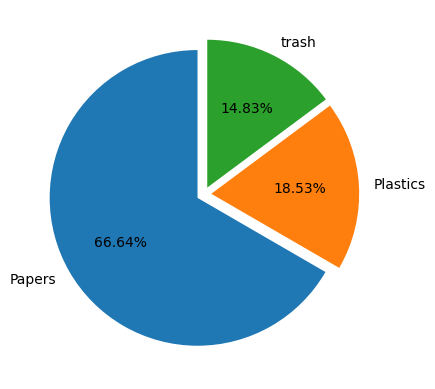

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05,0.05],autopct='%0.2f%%',
        labels=['Papers', 'Plastics', 'trash'])
plt.show()

In [ ]:
className = (['Papers', 'Plastics', 'trash'] )
numberOfClass = 3
print("Number Of Class: ",numberOfClass)

Number Of Class:  3


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

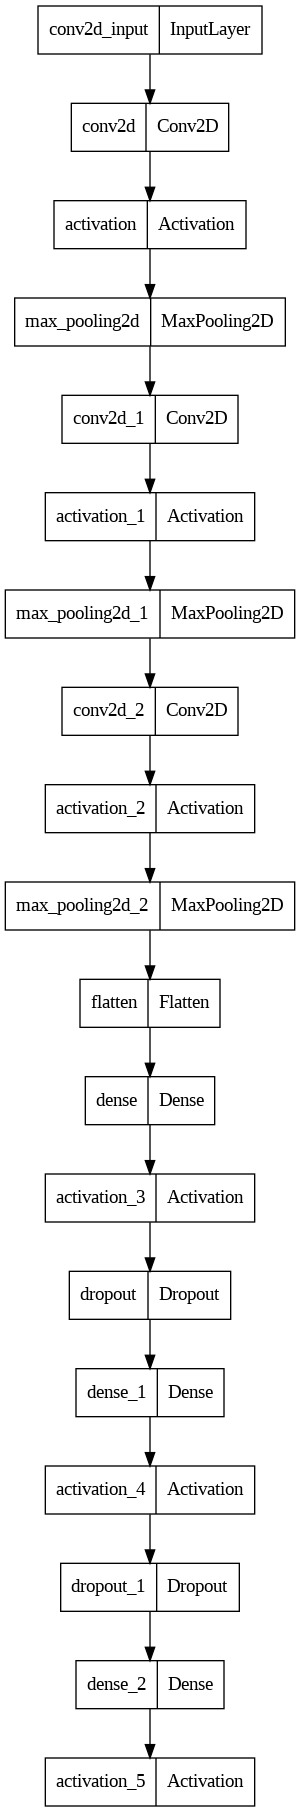

In [ ]:
plot_model(model)

In [ ]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")



Found 1292 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 57 images belonging to 3 classes.


In [ ]:
test_path = '/content/drive/MyDrive/Data/test/'

In [ ]:
train_path = '/content/drive/MyDrive/Data/Dataset/'

In [ ]:
hist = model.fit_generator(
        generator = train_generator,
        epochs=10,
        validation_data = test_generator)

Epoch 1/10
6/6 [==============================] - 192s 31s/step - loss: 0.5575 - accuracy: 0.6757 - val_loss: 0.7090 - val_accuracy: 0.2105
Epoch 2/10
6/6 [==============================] - 174s 27s/step - loss: 0.5395 - accuracy: 0.6757 - val_loss: 0.7169 - val_accuracy: 0.2105
Epoch 3/10
6/6 [==============================] - 175s 28s/step - loss: 0.5111 - accuracy: 0.6842 - val_loss: 0.6940 - val_accuracy: 0.2105
Epoch 4/10
6/6 [==============================] - 177s 35s/step - loss: 0.5140 - accuracy: 0.6796 - val_loss: 0.7659 - val_accuracy: 0.2105
Epoch 5/10
6/6 [==============================] - 177s 28s/step - loss: 0.4793 - accuracy: 0.6827 - val_loss: 0.7940 - val_accuracy: 0.2105
Epoch 6/10
6/6 [==============================] - 173s 28s/step - loss: 0.4514 - accuracy: 0.6989 - val_loss: 0.6856 - val_accuracy: 0.3333
Epoch 7/10
6/6 [==============================] - 176s 28s/step - loss: 0.4370 - accuracy: 0.6989 - val_loss: 0.8775 - val_accuracy: 0.2281
Epoch 8/10
6/6 [====

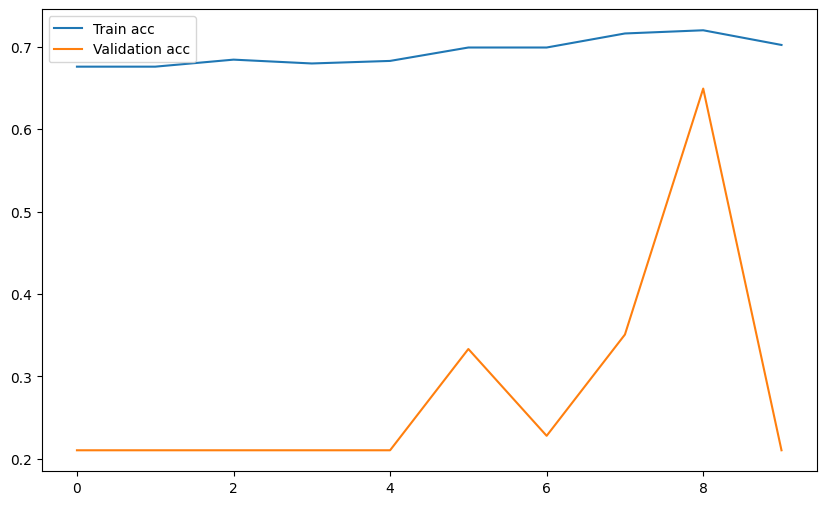

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

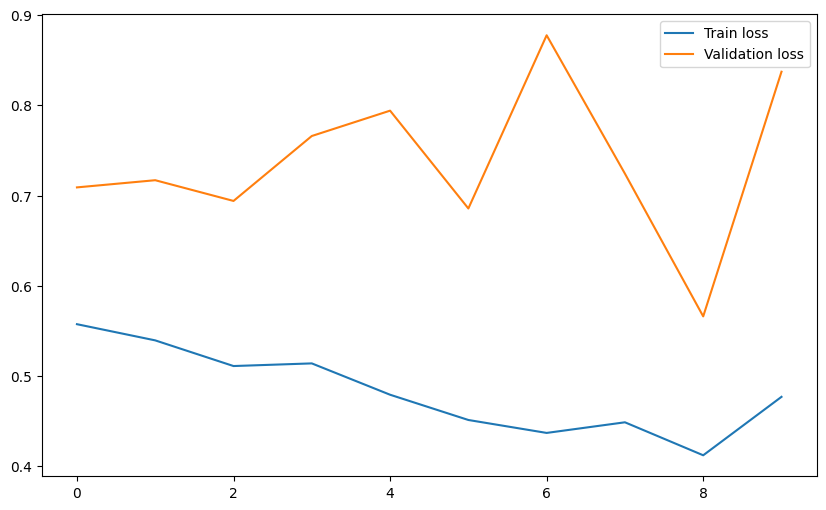

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Papers"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Plastics"+"\033[0m")
    else: print("\033[94m"+"This image -> trash"+"\033[0m")

1/1 [==============================] - 0s 348ms/step
This image -> Plastics


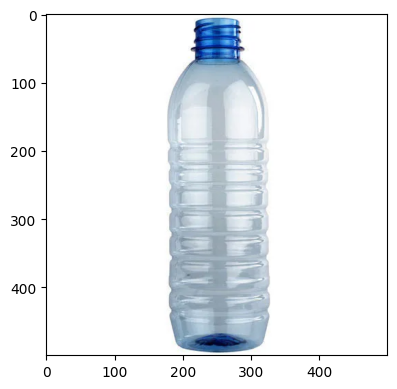

In [ ]:
test_img = cv2.imread("/1000-ml-plastic-water-bottle-1000x1000.webp")
predict_func(test_img)